## Exploring the Data

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
# loading in the data
fem_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Fem Temp.csv')
fem_act = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Fem Act.csv')
male_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Male Temp.csv')
male_act = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Male Act.csv')

In [23]:
#adding a time column, so that we can do like time of day analysis
#but this is also assuming that everything started at midnight on jan 1st
#and thats not exactly true, but it should be good for a some simple graphs
minutes_per_day=1440 # according to google
days=14 # bc its over 2 weeks
total_minutes =minutes_per_day *days 
time_index =pd.date_range(start="2024-01-01", periods=total_minutes, freq="T")

for df in [fem_act,fem_temp,male_act,male_temp]:
    df['Time'] =time_index # makin a a time column

# fem_act.head()

In [24]:
# melting the data to make plotting a bit easier
fem_temp_melt=fem_temp.melt(id_vars="Time", var_name="Mouse", value_name="Temperature")
male_temp_melt=male_temp.melt(id_vars="Time", var_name="Mouse", value_name="Temperature")
fem_act_melt =fem_act.melt(id_vars="Time", var_name="Mouse", value_name="Activity")
male_act_melt =male_act.melt(id_vars="Time", var_name="Mouse", value_name="Activity")

1. line plot of the mean temp over time (male v female)

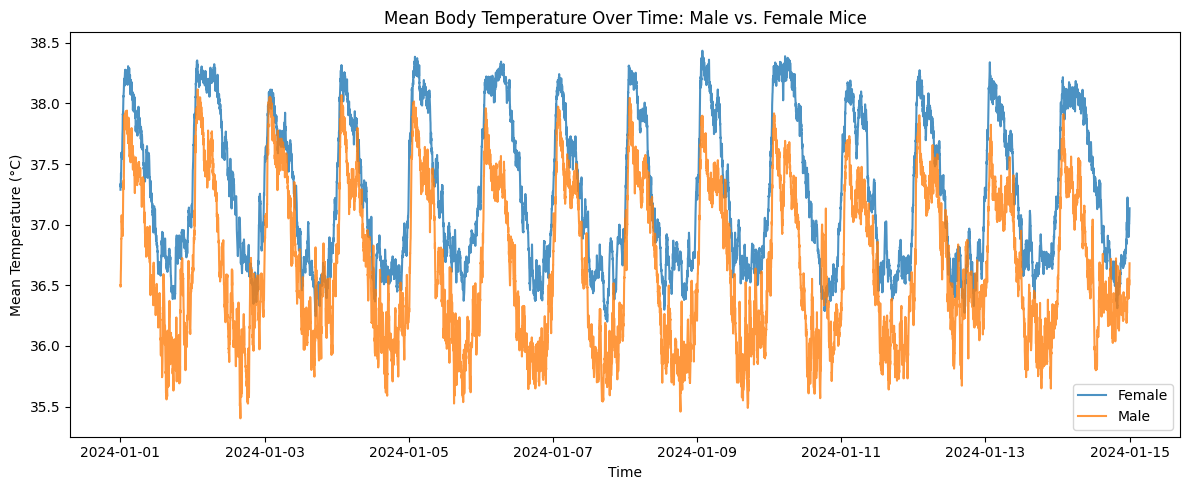

In [25]:
fem_temp_avg = fem_temp_melt.groupby("Time")["Temperature"].mean().reset_index()
fem_temp_avg["Sex"]="Female"

male_temp_avg = male_temp_melt.groupby("Time")["Temperature"].mean().reset_index()
male_temp_avg["Sex"] ="Male"

temp_avg_combined=pd.concat([fem_temp_avg, male_temp_avg])

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(fem_temp_avg["Time"], fem_temp_avg["Temperature"], label="Female", alpha=0.8)
ax.plot(male_temp_avg["Time"], male_temp_avg["Temperature"], label="Male", alpha=0.8)
ax.set_title("Mean Body Temperature Over Time: Male vs. Female Mice")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Temperature (°C)")
ax.legend()

plt.tight_layout()
plt.show()

2. box plot male v female activity levels day v night cycles

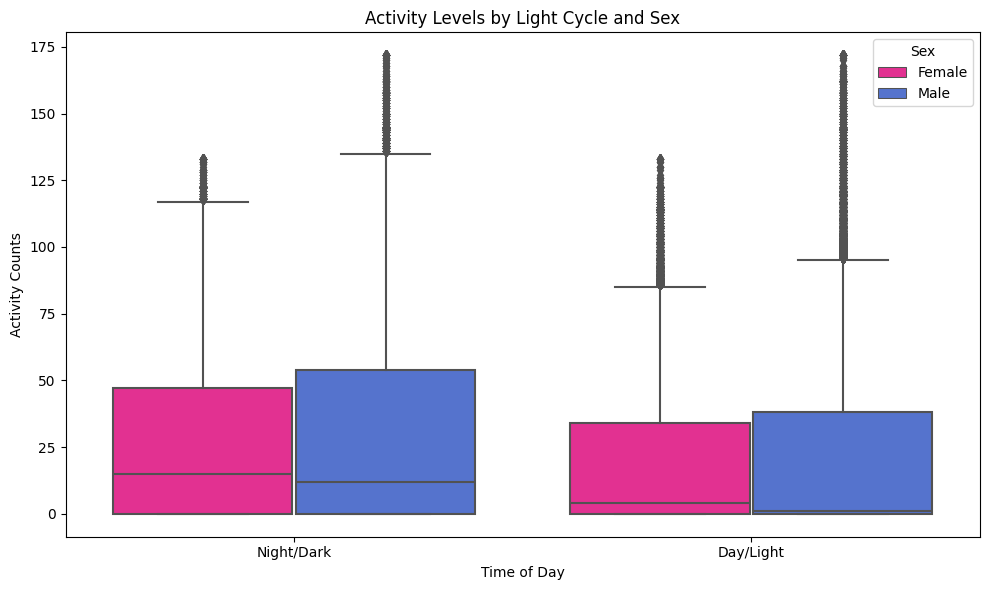

In [41]:
# making light and dark labels
for df in [fem_act_melt, male_act_melt]:
    df['Hour'] = df['Time'].dt.hour
    df['Light'] = np.where(df['Hour'].between(6, 17), 'Day/Light', 'Night/Dark')

fem_act_melt['Sex']='Female'
male_act_melt['Sex']='Male'

activity_combined = pd.concat([fem_act_melt, male_act_melt])

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=activity_combined, x='Light', y='Activity', hue='Sex',
            palette={'Female': 'deeppink', 'Male': 'royalblue'},ax=ax)
ax.set_title("Activity Levels by Light Cycle and Sex")
ax.set_ylabel("Activity Counts")
ax.set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

3. heatmap of a random female mouse across the 14 days

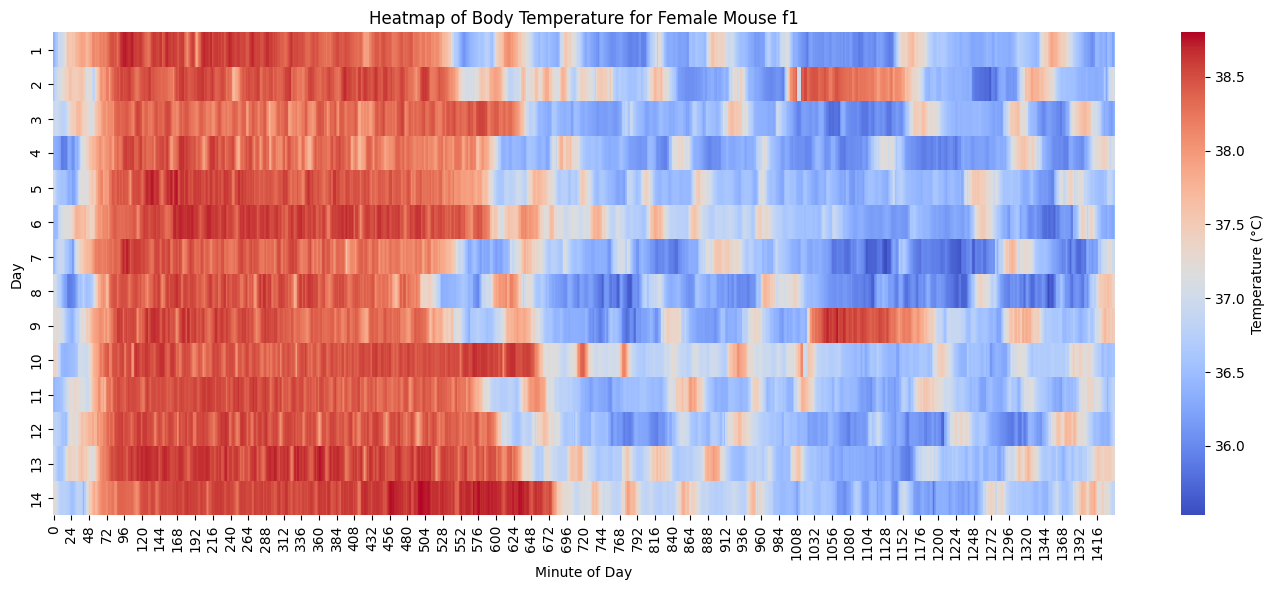

In [28]:
mouse_id='f8'
f1_temp =fem_temp[['Time', mouse_id]].copy()
f1_temp['Day'] =f1_temp['Time'].dt.day
f1_temp['Minute of Day'] = f1_temp['Time'].dt.hour*60 +f1_temp['Time'].dt.minute

f1_temp_matrix =f1_temp.pivot(index='Day', columns='Minute of Day', values=mouse_id)

plt.figure(figsize=(14, 6))
sns.heatmap(f1_temp_matrix, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})
plt.title("Heatmap of Body Temperature for Female Mouse f1")
plt.xlabel("Minute of Day")
plt.ylabel("Day")

plt.tight_layout()
plt.show()


4. scatterplot of activity v temp for females

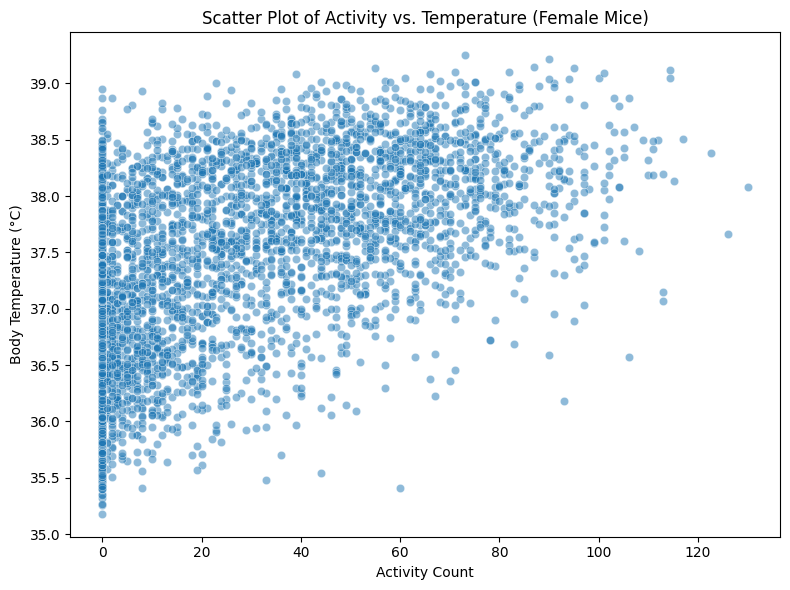

In [31]:
fem_merged=pd.merge(fem_act_melt, fem_temp_melt, on=["Time", "Mouse"])
#there were way too many data points on the plot so i took a sample so we can see them better
sampled_fem = fem_merged.sample(5000, random_state=42) 


plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_fem, x="Activity", y="Temperature", alpha=0.5)
plt.title("Scatter Plot of Activity vs. Temperature (Female Mice)")
plt.xlabel("Activity Count")
plt.ylabel("Body Temperature (°C)")

plt.tight_layout()
plt.show()


5. line plot of one female and one male mouse's temp

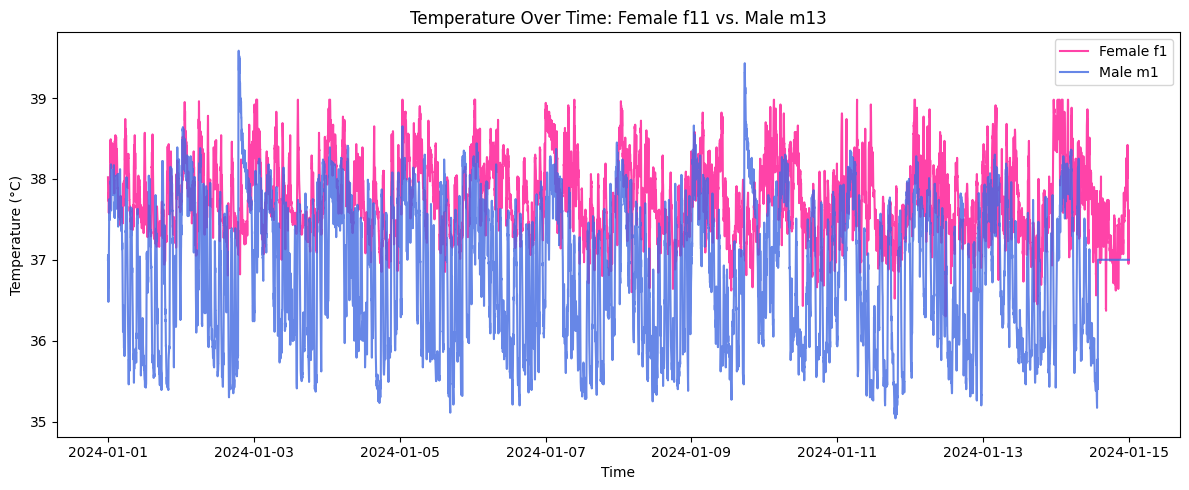

In [ ]:
# i just picked 2 random mice to compare
fem_11=fem_temp[["Time", "f11"]].rename(columns={"f11": "Temperature"})
fem_11["Mouse"]="Female F11"

male_13 = male_temp[["Time", "m13"]].rename(columns={"m13": "Temperature"})
male_13["Mouse"]="Male M13"

example_combined = pd.concat([fem_11, male_13])
fem_11 = fem_11.drop_duplicates(subset=["Time"])
male_13 = male_13.drop_duplicates(subset=["Time"])

paired_temp = pd.merge(fem_11, male_13, on="Time", suffixes=("_Female_f11", "_Male_m13"))

plt.figure(figsize=(12, 5))
plt.plot(paired_temp["Time"], paired_temp["Temperature_Female_f11"], label="Female f1", color="deeppink", alpha=0.8)
plt.plot(paired_temp["Time"], paired_temp["Temperature_Male_m13"], label="Male m1", color="royalblue",alpha=0.8)
plt.title("Temperature Over Time: Female f11 vs. Male m13")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()

plt.tight_layout()
plt.show()
